# Global Data Science Salary Analysis
### Python | Data Cleaning | Exploratory Data Analysis | Data Visualization

Analyzed global data science salary data alongside cost-of-living metrics to compare nominal compensation with purchasing power across countries.
The project focused on feature engineering, currency conversion, and exploratory analysis to identify geographic salary trends.

## 1. Dataset Description

The analysis combines global data science salary records with country-level cost-of-living indices to evaluate both nominal and real compensation.

In [1]:
import numpy as np
import plotly.express as px
import pandas as pd

In [22]:
salaries = pd.read_csv("salaries.csv")

## 2. Data Cleaning & Preparation

A cleaned analytical dataset was created to retain only variables relevant to salary analysis. Columns unrelated to compensation or company characteristics were removed to simplify analysis.

Records with invalid salary values (≤ 0) and missing company size information were excluded to maintain data quality and prevent misleading statistical results.

The resulting dataset, `updated_salaries`, serves as the primary working table for all subsequent analysis.

In [7]:
updated_salaries = salaries.loc[:, ['work_year', 'experience_level', 'employment_type', 'job_title', 'salary_in_cad', 'company_location', 'company_size']].copy()
condition1 = updated_salaries["salary_in_cad"] < 0
condition2 = updated_salaries['company_size'].isna().any()
updated_salaries = updated_salaries[~condition1 & ~condition2]
updated_salaries.head(10)

,work_year,experience_level,employment_type,job_title,salary_in_cad,company_location,company_size
0,2023,Entry-Level,FT,Applied Scientist,295775.0,US,L
1,2023,Entry-Level,FT,Applied Scientist,181014.0,US,L
2,2023,Entry-Level,FT,Data Quality Analyst,138433.0,NG,L
3,2023,Entry-Level,FT,Compliance Data Analyst,41530.0,NG,L
4,2023,Entry-Level,FT,Applied Scientist,283261.0,US,L
5,2023,Entry-Level,FT,Applied Scientist,153217.0,US,L
6,2023,Entry-Level,FT,Machine Learning Engineer,225916.0,US,M
7,2023,Entry-Level,FT,Machine Learning Engineer,201952.0,US,M
8,2023,Entry-Level,FT,Research Scientist,304552.0,US,L
9,2023,Entry-Level,FT,Data Engineer,117668.0,US,M


## Feature Engineering: Currency Standardization
The salary dataset reports compensation in USD, while analysis in this project
is performed using Canadian dollars (CAD). To ensure consistent comparisons,
all salary values were converted from USD to CAD using a fixed exchange rate.

A reusable function was created to apply the conversion efficiently across
salary columns.

**Exchange rate:** 0.73075296 US Dollars for 1 CAD.
Credit: https://www.xe.com/currencyconverter/convert/?Amount=1&From=CAD&To=USD

In [4]:
EXCHANGE_RATE = 0.72237338  # USD per 1 CAD

def usd_to_cad(salaries):
  salaries = np.array(salaries)
  return np.round(salaries / EXCHANGE_RATE, 0)

In [5]:
salaries["salary_in_cad"] = salaries["salary_in_usd"].apply(usd_to_cad)
salaries

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size,salary_in_cad
0,2023,Entry-Level,FT,Applied Scientist,213660,USD,213660,US,L,295775.0
1,2023,Entry-Level,FT,Applied Scientist,130760,USD,130760,US,L,181014.0
2,2023,Entry-Level,FT,Data Quality Analyst,100000,USD,100000,NG,L,138433.0
3,2023,Entry-Level,FT,Compliance Data Analyst,30000,USD,30000,NG,L,41530.0
4,2023,Entry-Level,FT,Applied Scientist,204620,USD,204620,US,L,283261.0
...,...,...,...,...,...,...,...,...,...,...
3756,2020,Senior,FT,Principal Data Scientist,130000,EUR,148261,DE,M,205242.0
3757,2020,Senior,FT,Data Scientist,80000,EUR,91237,AT,S,126302.0
3758,2020,Senior,FT,Data Science Manager,190200,USD,190200,US,M,263299.0
3759,2020,Senior,FT,Machine Learning Engineer,40000,EUR,45618,HR,S,63150.0


All salary values are now standardized in CAD, allowing direct comparison
between countries and alignment with Canadian cost-of-living data.

## 3. Exploratory Data Analysis

To understand where high-paying data science roles are concentrated, salary records were sorted by compensation and analyzed by company location. Aggregating salaries by country allows identification of regional hiring patterns and geographic compensation trends.

High-salary observations were examined by sorting the dataset in descending order of compensation.

In [8]:
sorted_salaries = updated_salaries.sort_values('salary_in_cad', ascending=False)
sorted_salaries

,work_year,experience_level,employment_type,job_title,salary_in_cad,company_location,company_size
3714,2020,Mid-Level,FT,Research Scientist,622947.0,US,M
2008,2022,Mid-Level,FT,Data Analyst,596599.0,GB,M
893,2023,Senior,FT,AI Scientist,586724.0,IL,L
3609,2021,Mid-Level,FT,Applied Machine Learning Scientist,585570.0,US,L
3519,2021,Junior-Level,CT,Principal Data Scientist,575879.0,US,S
...,...,...,...,...,...,...,...
3702,2020,Entry-Level,FT,Data Science Consultant,7900.0,IN,M
3579,2021,Mid-Level,FT,Data Scientist,7862.0,US,S
3457,2021,Entry-Level,FT,Power BI Developer,7488.0,IN,L
3546,2021,Mid-Level,PT,3D Computer Vision Researcher,7488.0,IN,M


The number of salary records was aggregated by company location to identify which countries appear most frequently in the dataset.

In [9]:
num_salaries_by_company = updated_salaries.groupby('company_location').size().reset_index(name='counts')
num_salaries_by_company

,company_location,counts
0,AE,3
1,AL,1
2,AM,1
3,AR,3
4,AS,3
...,...,...
67,TH,3
68,TR,5
69,UA,4
70,US,3045


A bar chart was created to visualize the geographic distribution of companies represented in the dataset.

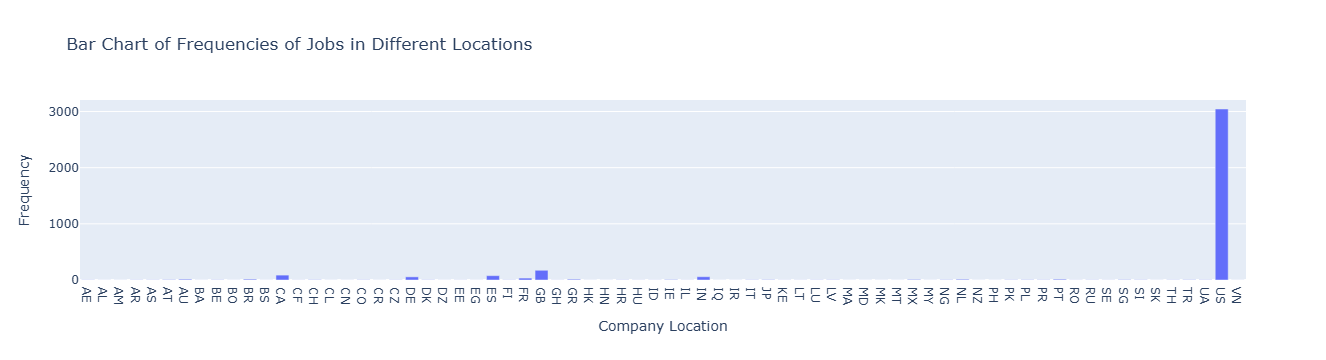

In [10]:
# Write your code here...
fig = px.bar(
    num_salaries_by_company,
    x = 'company_location',
    y = 'counts',
    title="Bar Chart of Frequencies of Jobs in Different Locations",
    labels={'company_location': 'Company Location', 'counts': 'Frequency'}
)

fig.show()

### Key Findings

Analysis shows that the highest salaries are predominantly concentrated in the United States, indicating a strong demand for data science roles within North American technology markets.

High compensation opportunities appear regionally concentrated rather than globally distributed, with fewer top-paying roles appearing in other countries.

One possible explanation is the higher concentration of large technology companies and mature data-driven industries in the United States compared to other regions.

### Entry-Level Compensation Analysis by Company Size

To understand how company size influences early-career earnings, average salaries for entry-level employees were analyzed across company sizes and work years.

A pivot table was constructed to compare compensation trends over time, allowing simultaneous examination of temporal and organizational effects on salary outcomes.

In [11]:
entry_level_jobs = updated_salaries.loc[updated_salaries['experience_level'] == 'Entry-Level']
entry_level_jobs_pt = entry_level_jobs.pivot_table(
    index='work_year',
    columns='company_size',
    values='salary_in_cad',
    aggfunc=np.mean
)

entry_level_jobs_pt


/tmp/ipykernel_378/292124400.py:2: FutureWarning:

The provided callable <function mean at 0x7f1e60246de0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.



company_size,L,M,S
work_year,,,
2020,108704.777778,31577.333333,68915.090909
2021,78908.681818,59036.529412,90047.562500
2022,98731.750000,119224.250000,77751.750000
2023,121310.600000,137522.965517,94569.666667


### Salary Trends by Experience Level

To understand how compensation changes throughout a data science career, the median salary was analyzed across experience levels. The median was used instead of the mean to reduce the influence of extreme salary outliers.

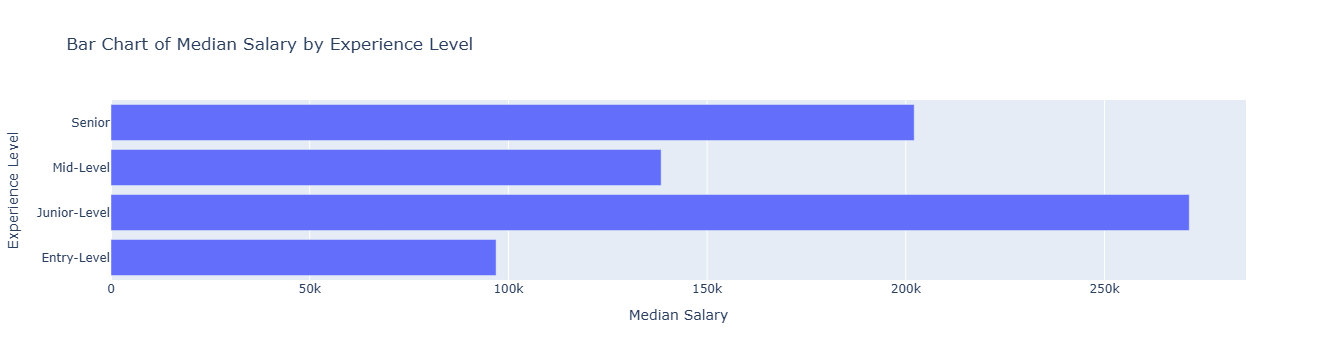

In [13]:
median_salaries = updated_salaries.groupby('experience_level')['salary_in_cad'].median().to_frame()
median_salaries = median_salaries.rename(columns={'salary_in_cad': 'median_salary'}).reset_index()
median_salaries

median_salaries_bar_chart = px.bar(
    median_salaries,
    x='median_salary',
    y='experience_level',
    title="Bar Chart of Median Salary by Experience Level",
    labels={'median_salary': 'Median Salary', 'experience_level': 'Experience Level'}
)

median_salaries_bar_chart.show()

In [14]:
num_salaries_by_exp_level = updated_salaries.groupby('experience_level').size().reset_index(name='counts')
num_salaries_by_exp_level

,experience_level,counts
0,Entry-Level,320
1,Junior-Level,114
2,Mid-Level,809
3,Senior,2518


Median compensation generally increases with experience level, indicating a positive relationship between professional experience and earning potential. However, junior analyst roles display an unusually high median salary compared to other experience categories. This may reflect differences in job titles, industry demand, or a smaller sample size influencing the median value.

### Salary Growth Over Time

Average salary was examined across work years to identify overall compensation trends and potential industry growth.

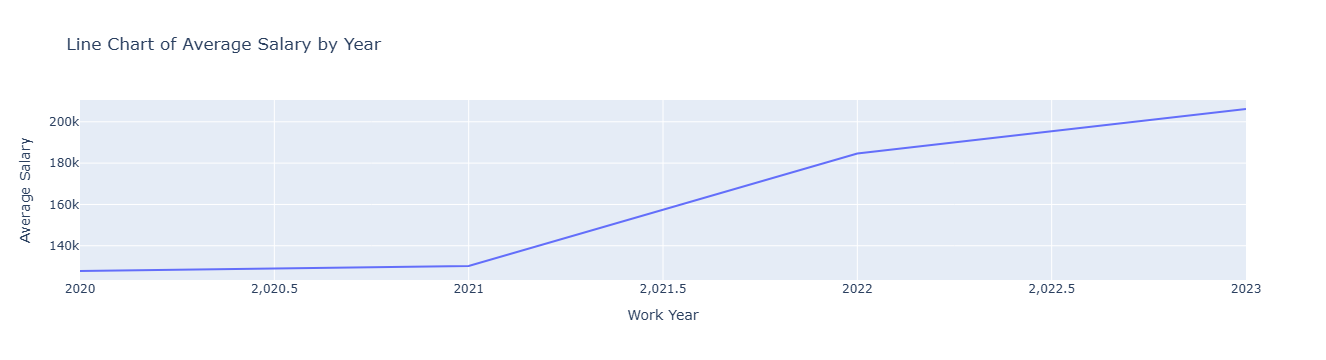

In [16]:
avg_salary_by_year = updated_salaries.groupby('work_year')['salary_in_cad'].mean().to_frame()
avg_salary_by_year = avg_salary_by_year.rename(columns={'salary_in_cad': 'mean_salary'}).reset_index()
avg_salary_by_year

salary_by_year_line_chart = px.line(
  avg_salary_by_year,
  x='work_year',
  y='mean_salary',
  title='Line Chart of Average Salary by Year',
  labels={'mean_salary': 'Average Salary', 'work_year': 'Work Year'})

salary_by_year_line_chart.show()

Average salaries show an upward trend over time, suggesting increasing market demand for data professionals and rising industry compensation.

### Salary Distribution Comparison: 2021 vs 2023

To evaluate how compensation changed over time, salary distributions from 2021 and 2023 were compared using histograms with identical bin ranges. Using consistent bins allows meaningful comparison of distribution shape and central tendency.

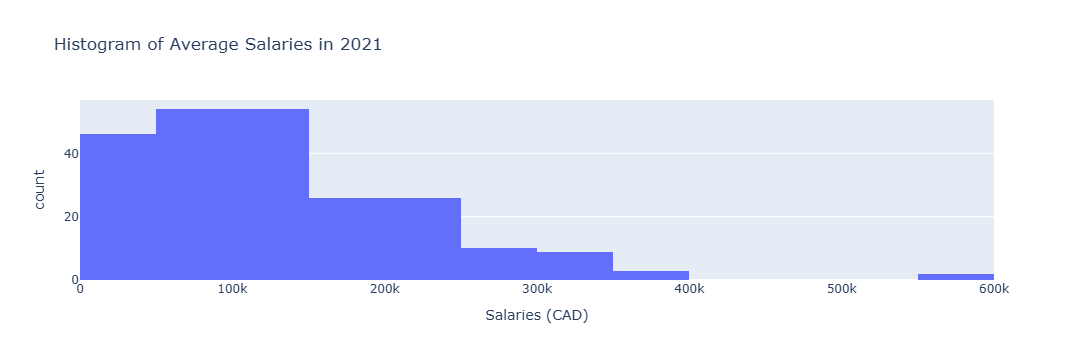

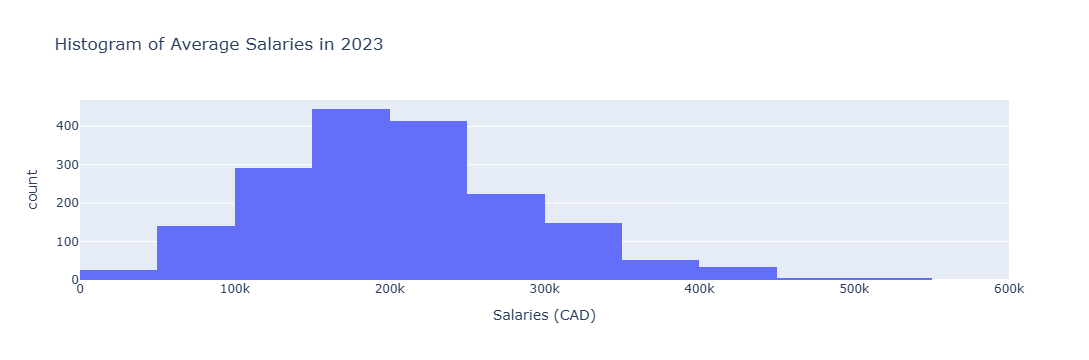

In [17]:
# Write your code here
salaries_2021 = updated_salaries.loc[updated_salaries['work_year'] == 2021]
salaries_2023 = updated_salaries.loc[updated_salaries['work_year'] == 2023]

salaries_2021_hist = px.histogram(
    salaries_2021,
    x="salary_in_cad",
    nbins=20,
    title='Histogram of Average Salaries in 2021',
    labels={'salary_in_cad': 'Salaries (CAD)', 'count': 'Frequency'}
)
salaries_2021_hist.show()

salaries_2023_hist = px.histogram(
    salaries_2023,
    x="salary_in_cad",
    nbins=20,
    title='Histogram of Average Salaries in 2023',
    labels={'salary_in_cad': 'Salaries (CAD)', 'count': 'Frequency'}
)
salaries_2023_hist.show()

Both histograms are right-skewed, but the 2021 histogram is shifted to the left more than the 2023 histogram. This suggests that salaries increased between 2021 and 2023, since the 2023 histogram has more of the bulk of its data at a higher range of values.

### Experience vs Compensation in Large Companies

A scatterplot was created to examine the relationship between experience level and average salary within large companies, where structured pay scales are more common.

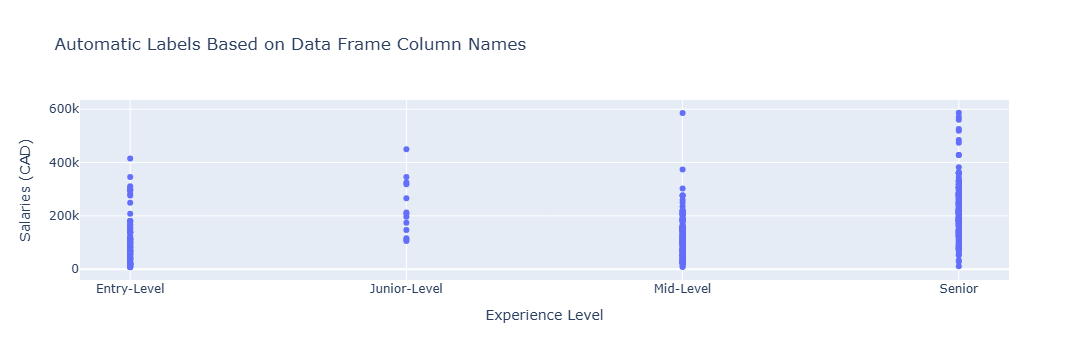

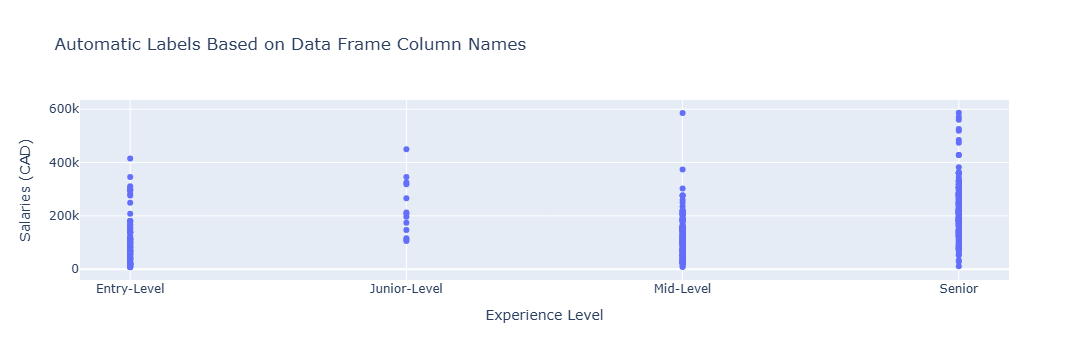

In [19]:
# Write your code here...
large_companies = updated_salaries.loc[updated_salaries['company_size'] == 'L']
large_companies

sp = px.scatter(large_companies,
                x="experience_level",
                y="salary_in_cad",
                title="Automatic Labels Based on Data Frame Column Names",
                labels={'salary_in_cad': 'Salaries (CAD)', 'experience_level': 'Experience Level'}
                )

sp.update_xaxes(
    categoryorder='array', 
    categoryarray= ['Entry-Level', 'Junior-Level', 'Mid-Level', 'Senior']
    )


sp.show()
sp.show()

The visualization doesn't show a clear positive association between experience and salary, however, senior roles command a substantially higher range for compensation in large companies. This could be due to the large sample size of senior roles compared to other roles. Otherwise, all expeirence levels have a similarly wide salary range.

## 4. Purchasing Power Analysis

### Adjusting Salaries for Cost of Living

Nominal salaries alone do not reflect true purchasing power across countries. To enable fair geographic comparison, salary data was merged with a cost-of-living index and adjusted to approximate real income.

In [27]:
updated_salaries = updated_salaries.merge(
    cost_of_living,
    on="company_location",
    how="left"
)
updated_salaries

,work_year,experience_level,employment_type,job_title,salary_in_cad,company_location,company_size,cost_of_living_index
0,2023,Entry-Level,FT,Applied Scientist,295775.0,US,L,79
1,2023,Entry-Level,FT,Applied Scientist,181014.0,US,L,79
2,2023,Entry-Level,FT,Data Quality Analyst,138433.0,NG,L,33
3,2023,Entry-Level,FT,Compliance Data Analyst,41530.0,NG,L,33
4,2023,Entry-Level,FT,Applied Scientist,283261.0,US,L,79
...,...,...,...,...,...,...,...,...
3756,2020,Senior,FT,Principal Data Scientist,205242.0,DE,M,44
3757,2020,Senior,FT,Data Scientist,126302.0,AT,S,89
3758,2020,Senior,FT,Data Science Manager,263299.0,US,M,79
3759,2020,Senior,FT,Machine Learning Engineer,63150.0,HR,S,115


A cost-of-living–adjusted salary metric was created to estimate relative purchasing power across locations.

In [29]:
updated_salaries["real_salary"] = (updated_salaries["salary_in_cad"] / updated_salaries["cost_of_living_index"])
updated_salaries

,work_year,experience_level,employment_type,job_title,salary_in_cad,company_location,company_size,cost_of_living_index,real_salary
0,2023,Entry-Level,FT,Applied Scientist,295775.0,US,L,79,3743.987342
1,2023,Entry-Level,FT,Applied Scientist,181014.0,US,L,79,2291.316456
2,2023,Entry-Level,FT,Data Quality Analyst,138433.0,NG,L,33,4194.939394
3,2023,Entry-Level,FT,Compliance Data Analyst,41530.0,NG,L,33,1258.484848
4,2023,Entry-Level,FT,Applied Scientist,283261.0,US,L,79,3585.582278
...,...,...,...,...,...,...,...,...,...
3756,2020,Senior,FT,Principal Data Scientist,205242.0,DE,M,44,4664.590909
3757,2020,Senior,FT,Data Scientist,126302.0,AT,S,89,1419.123596
3758,2020,Senior,FT,Data Science Manager,263299.0,US,M,79,3332.898734
3759,2020,Senior,FT,Machine Learning Engineer,63150.0,HR,S,115,549.130435


In [34]:
sorted_salaries = updated_salaries.sort_values('real_salary', ascending=False)
sorted_salaries.head(15)

,work_year,experience_level,employment_type,job_title,salary_in_cad,company_location,company_size,cost_of_living_index,real_salary
2008,2022,Mid-Level,FT,Data Analyst,596599.0,GB,M,50,11931.980000
1387,2023,Senior,FT,Research Scientist,351273.0,ES,M,31,11331.387097
1389,2023,Senior,FT,Research Scientist,351273.0,ES,M,31,11331.387097
3513,2021,Junior-Level,FT,Head of Data,318395.0,RU,L,36,8844.305556
1212,2023,Senior,FT,Machine Learning Engineer,380690.0,DE,M,44,8652.045455
517,2023,Senior,FT,Research Engineer,380690.0,DE,M,44,8652.045455
2929,2022,Senior,FT,BI Analyst,276865.0,NG,S,33,8389.848485
893,2023,Senior,FT,AI Scientist,586724.0,IL,L,71,8263.718310
3714,2020,Mid-Level,FT,Research Scientist,622947.0,US,M,79,7885.405063
1390,2023,Senior,FT,Research Scientist,234228.0,ES,M,31,7555.741935


After adjusting for cost of living, several lower-cost countries provide competitive or higher real purchasing power compared to traditionally high-paying regions.

### Nominal Salary vs Real Salary

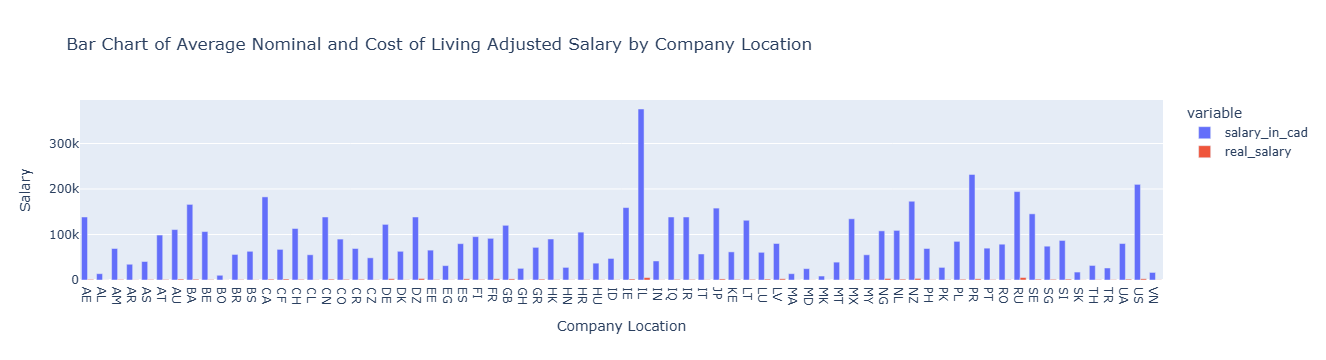

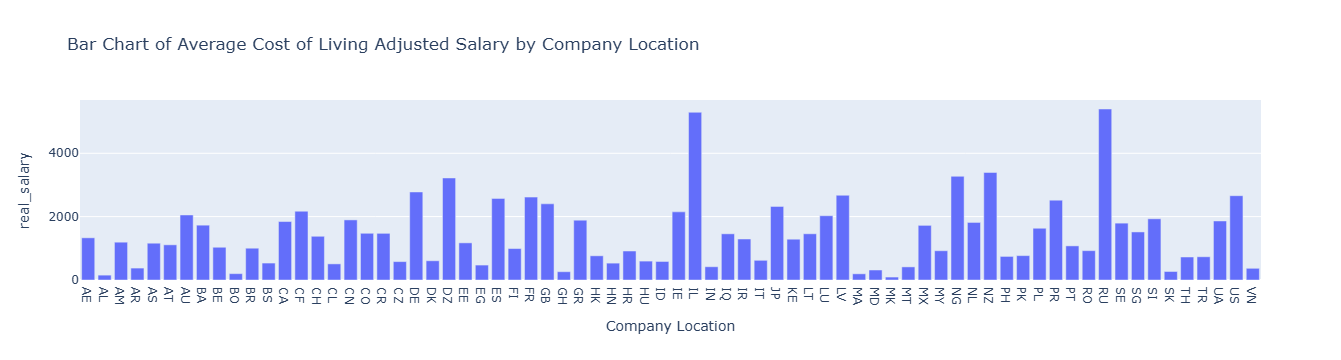

In [46]:
salary_comparison = updated_salaries.groupby("company_location")[["salary_in_cad","real_salary"]].mean().reset_index()

fig1 = px.bar(
    salary_comparison,
    x = 'company_location',
    y = ['salary_in_cad', 'real_salary'],
    barmode = 'group',
    title="Bar Chart of Average Nominal and Cost of Living Adjusted Salary by Company Location",
    labels={'company_location': 'Company Location', 'value': 'Salary'}
)

fig2 = px.bar(
    salary_comparison,
    x = 'company_location',
    y = 'real_salary',
    title="Bar Chart of Average Cost of Living Adjusted Salary by Company Location",
    labels={'company_location': 'Company Location', 'value': 'Salary'}
)

fig1.show()
fig2.show()

Adjusting salaries for cost of living reveals meaningful differences between nominal compensation and real earning potential. While certain countries offer higher raw salaries, employees in lower-cost regions may experience comparable or superior purchasing power.

## 5. Salary Variability and Statistical Summary

To quantify salary variability across roles, regions, and companies, measures of dispersion were calculated using the salary_in_cad column. Range and standard deviation provide insight into compensation inequality and spread.

In [21]:
# Write your code here
max = updated_salaries['salary_in_cad'].max()
min = updated_salaries['salary_in_cad'].min()
salary_range = max - min

salary_std = updated_salaries['salary_in_cad'].std()
salary_range, salary_std

(615843.0, 87243.33165457963)

### Interpretation

The large salary range indicates a substantial gap between entry-level and top-paying positions, reflecting wide compensation differences across experience levels and geographic markets.

The high standard deviation suggests considerable variation around the average salary, indicating that compensation is strongly influenced by
factors such as company size, specialization, and location.

## Key Findings
* Salaries variability increases with experience
* Compensation has grown between 2021–2023
* High-paying jobs are geographically concentrated in the US
* Large companies offer stronger entry-level compensation
* Cost-of-living adjustments significantly change global rankings. People employed in countries like New Zealand, Israel, Russia have more purchasing power than those in the Unites States